In [25]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
import pylab as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter, correlate, correlate1d

In [99]:
W,H = 25,25
sig1 = 1.
sig2 = 2.
psfsig1 = 2.
psfsig2 = 1.02
flux = 100. * 100./19.06/1.0364

In [100]:
cx = W//2
cy = H//2
xx,yy = np.meshgrid(np.arange(W), np.arange(H))
image1 = flux/(2.*np.pi*psfsig1**2) * np.exp(-((xx-cx)**2 + (yy-cy)**2) / (2.*psfsig1**2))
image2 = flux/(2.*np.pi*psfsig2**2) * np.exp(-((xx-cx)**2 + (yy-cy)**2) / (2.*psfsig2**2))

In [101]:
psfnorm1 = 1./(2.*np.sqrt(np.pi)*psfsig1)
psfnorm2 = 1./(2.*np.sqrt(np.pi)*psfsig2)
detmap1 = gaussian_filter(image1, psfsig1) / (psfnorm1**2)
detmap2 = gaussian_filter(image2, psfsig2) / (psfnorm2**2)
detsig1 = sig1 / psfnorm1
detsig2 = sig2 / psfnorm2
detmap = (detmap1 * (1./detsig1**2) + detmap2 * (1./detsig2**2)) / (1./detsig1**2 + 1./detsig2**2)
detsig = np.sqrt(1./(1./detsig1**2 + 1./detsig2**2))

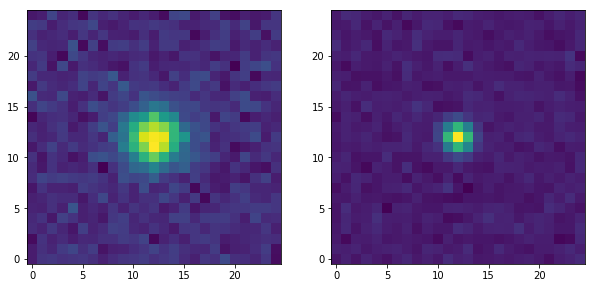

In [102]:
noisy1 = image1 + np.random.normal(size=image1.shape) * sig1
noisy2 = image2 + np.random.normal(size=image2.shape) * sig2
plt.subplot(1,2,1)
plt.imshow(noisy1, interpolation='nearest', origin='lower')
plt.subplot(1,2,2)
plt.imshow(noisy2, interpolation='nearest', origin='lower')

506.278014681873

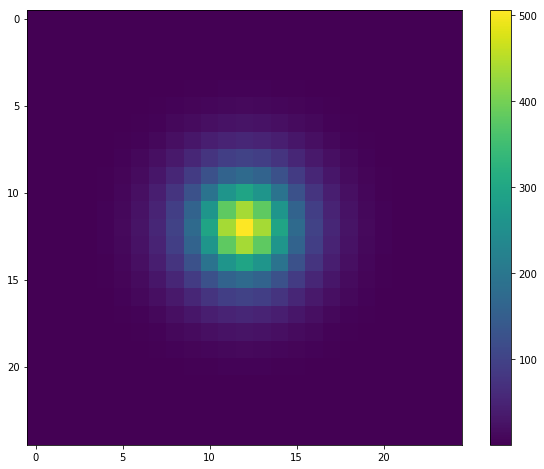

In [103]:
plt.imshow(detmap)
plt.colorbar()
detmap.max()

In [104]:
detmap1.max()/detsig1, detmap2.max()/detsig2, detmap.max()/detsig

(71.40523368023322, 70.01305638364165, 100.00267710956787)

In [105]:
alphas = np.linspace(0, 1, 101)
codetsn = np.zeros(len(alphas), np.float32)

psfimg1 = 1./(2.*np.pi*psfsig1**2) * np.exp(-0.5 * ((xx-cx)**2 + (yy-cy)**2) / psfsig1**2)
psfimg2 = 1./(2.*np.pi*psfsig2**2) * np.exp(-0.5 * ((xx-cx)**2 + (yy-cy)**2) / psfsig2**2)
norm1 = np.sqrt(np.sum(psfimg1**2))
norm2 = np.sqrt(np.sum(psfimg2**2))

for ii,alpha in enumerate(alphas):
    beta = 1.-alpha
    coadd = alpha * image1 + beta * image2
    cosig = np.sqrt((alpha * sig1)**2 + (beta * sig2)**2)
    copsf = alpha * psfimg1 + beta * psfimg2
    conorm = np.sqrt(np.sum(copsf**2))
    #print('Norms', norm1, norm2, conorm)
    #print('Sigmas', sig1, sig2, cosig)
    codet = correlate(coadd, copsf) / conorm**2
    codetsig = cosig / conorm
    codetsn[ii] = codet.max() / codetsig

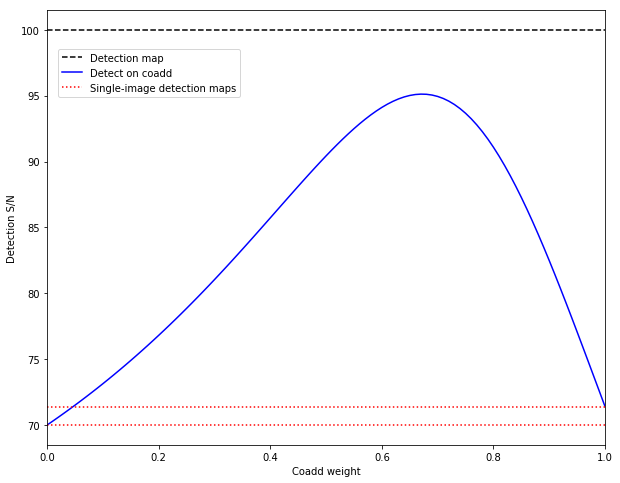

In [106]:
plt.axhline(detmap.max()/detsig, color='k', linestyle='--', label='Detection map')
plt.plot(alphas, codetsn, 'b-', label='Detect on coadd')
plt.axhline(detmap1.max()/detsig1, color='r', linestyle=':', label='Single-image detection maps')
plt.axhline(detmap2.max()/detsig2, color='r', linestyle=':')
plt.legend(loc=(0.02, 0.8))#'upper left')
plt.xlim(0,1)
plt.xlabel('Coadd weight')
plt.ylabel('Detection S/N');

In [107]:
detmap.max()/detsig

100.00267710956787